In [1]:
# Version: 0.0.1
# Date:    2022-07-22
# Author:  P. J. Vetter, Timo Joas
# Email=  philipp.vetter@uni-ulm.de;

In [1]:
# Simulation to investigate the robustness of the optimal control pulse. 
# Pulse units are abstracted away by imported ArbPulse class

# The oc_element function reads in the pulse files and creates the corresponding pulse

# all possible initial states are defined in the 'Initial State' section
# density matrix of the m_s = 0 state: rho_ms0 
# density matrix of the m_s = -1 state: rho_msm1
# density matrix of the x state: rho_x
# density matrix of the y state: rho_y

# (The first run might take a bit longer due to the plot generation)

# Packages

In [1]:
import os
os.getcwd()

'C:\\Software\\qudi\\user_scripts\\Timo\\own\\optimalcontrol'

In [2]:
#%matplotlib notebook
#%matplotlib notebook

import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from scipy import interpolate
import matplotlib as mpl

from oc_simlib import TimeDependentSimulation, SimParameters, ArbPulse, PredefinedArbPulses

plt.rcParams.update({'font.size': 30})  

# Library

In [3]:
def get_f_limits(f_res, f_center_block, df, symm_block=False):
    f_center_block_mhz = f_center_block*1e-6
    f_res_mhz = f_res*1e-6
    df_mhz = df*1e-6
    freqs = []
    if symm_block:
        delta_block = f_center_block_mhz - f_res_mhz
        f_center_2_mhz = f_res_mhz - delta_block
        f_centers = [f_center_block_mhz, f_center_2_mhz]
    else:
        f_centers = [f_center_block_mhz]
    for f in f_centers:
        freqs.append([1e6*(f-df_mhz), 1e6*(f+df_mhz)])
    return freqs
    
def calc_crosstalk_penalty(freqs, spin_pop, f_res, f_center_block, df, symm_block=False, fac_penalty=1):

    
    idxs = np.empty((0), dtype=int)
    for (f_min, f_max) in get_f_limits(f_res, f_center_block, df, symm_block=symm_block):      
        idxs = np.append(idxs, np.where(np.logical_and(freqs >= f_min, freqs <= f_max)))
    
    #return idxs
    spin_pop = np.mean(spin_pop[idxs])
    
    # as in optimalcontrol_quocs.ipynb
    fom_sim = (1 + fac_penalty*(abs(1-spin_pop)))
    
    return fom_sim

# Variables

In [4]:
# magnetic field [G]
B = 90

## Load pulses

In [ ]:



folder = r"input_pulses\rect"
name = "rec_amp_20MHz_0.025mus_"
#pulse = ArbPulse.load_pulse(folder, name, unit_t='µs', unit_data='MHz')

#folder = r"input_pulses"
#name = "on_nv=2_"

folder = r"C:\Software\qudi_data\optimal_control_assets\20220727_1_guessFromReisserMsc"
name = "opt_res_"
pulse = ArbPulse.load_pulse(folder, name, unit_t='s', unit_data='V',
                            func_ampl_v_2_omega_mhz=lambda x: x/0.25*20,
                            func_omega_mhz_2_ampl_v=lambda x: 1/(x/0.25*20))

folder = r"C:\Software\qudi_data\optimal_control_assets\20220817_1_guessFromReisserMsc_penalty_fac=100"
name = "opt_res_"
name = "opt_res_"
pulse = ArbPulse.load_pulse(folder, name, unit_t='s', unit_data='V',
                            func_ampl_v_2_omega_mhz=lambda x: x/0.25*20,
                            func_omega_mhz_2_ampl_v=lambda x: 1/(x/0.25*20))

#folder = r"C:\Software\qudi_data\optimal_control_assets\Reisser_MSc_pulse_1"
#name = "Opt_Pulse_01_"
#pulse = ArbPulse.load_pulse(folder, name, unit_t='ns', unit_data='MHz')


# loading experimental pulse
# 0.25 = 20 MHz
#pulse = ArbPulse.load_pulse(folder, name, unit_t='s',  func_ampl_v_2_omega_mhz=lambda x: x/0.25*20)


#pulse = TimeDependentSimulation.load_pulse(folder, name, func_t_2_us=lambda t: t*1e6)
#
pulse.as_dict()




In [ ]:
pulse.as_dict()

In [ ]:
len(pulse.as_dict()['timegrid_ampl'])

## Generate pulses

In [ ]:

pulse = PredefinedArbPulses.generate_levitt(20e6, phase=0)
#pulse = PredefinedArbPulses.generate_rect_pi(20e6, phase=0)

#pulse['data_phase']
#val_i, val_q = np.asarray([1,0])*1
#np.asarray([np.pi/2, 0, np.pi/2]) + 0

#data_ampl = np.asarray([0,0,0])
#data_ampl[0:3] = 1
#data_ampl

## Plot pulses

In [ ]:
import matplotlib.pyplot as plt
    
t_amplitude = pulse.get_timegrid(unit='µs')
amplitude = pulse.get_data_ampl(unit='MHz')
t_phase = pulse.get_timegrid(unit='µs')
phase = pulse.get_data_phase(unit='MHz')

try:
    plt.figure(figsize=(10,6))
    plt.plot(t_amplitude, amplitude, label="Ampl (I)")
    plt.plot(t_phase, phase, label="Phase (Q)")
   # plt.plot(t_phase, phase+amplitude, label="I+Q")
    plt.ylabel("Rabi freq (MHz)")
    plt.xlabel("time (us)")
    plt.legend(loc='best', prop={'size': 20})
    plt.show()
except:
    logger.exception("")

# Parameters, Operators

In [ ]:

simp = SimParameters()
simp.gamma_nv

# Measurements

In [ ]:
f_exp_mhz = 1e-6*exp_data[0,:] - (2710-2628)
f_exp_mhz_mirr = 1e-6*exp_data[0,:][::-1] - (2710-2628)
y_exp = (exp_data[1,:]*3.6)-2.55

In [ ]:


#get_f_limits(1e6*f_mw, 1e6*f_block, 1e6*df_block, symm_block=True)
#np.where(np.logical_and(freq_array >= 2700, freq_array <= 2720))

## Frequency Detuning

In [ ]:

B = 86.07
df = 25#120#120 # MHz

f_block = 2710 # MHz
df_block = 10
symm_block = True
fac_penalty = 100
f_mw = simp.gamma_nv * B
B_nv2 = (2870-f_block)/simp.gamma_nv

n_f = np.min([int(df/0.25), 500])
n_f= 20



sim = TimeDependentSimulation()

freq_array = np.linspace(simp.D - simp.gamma_nv * B - df, simp.D - simp.gamma_nv * B + df, n_f)
#freq_array = np.linspace(3000, 3200, n_f)
#freq_array = np.linspace(2000, 3200, n_f)

#freq_array = np.linspace(2710-10, 2710+10, 50)
data_freq_detuning = sim.run_sim_fsweep(freq_array, pulse, B, simp)
penalty = calc_crosstalk_penalty(1e6*freq_array, data_freq_detuning, 1e6*f_mw, 1e6*f_block, 1e6*df_block,
                                 symm_block=symm_block, fac_penalty=fac_penalty)


In [ ]:
1e-6*f_center, freq_array[0]

In [ ]:
f_res = 2628.56e6
func_volt_2_rabi = lambda x: x/0.25*20

simp = SimParameters()

B_gauss = (simp.D - f_res*1e-6)/ simp.gamma_nv

# reloading pulse to make sure units are correct
pulse = ArbPulse.load_pulse(pulse._folder, pulse.name, extension='txt',
                             unit_t='s', unit_data='V', 
                              func_ampl_v_2_omega_mhz=func_volt_2_rabi
                              )


sim = TimeDependentSimulation()

freq_array = [f_res]
data_freq_detuning = sim.run_sim_fsweep(freq_array, pulse, B_gauss, simp)
#spin_pop = np.mean(data_freq_detuning)
#spin_pop

pulse

In [ ]:
f_mw = simp.D - simp.gamma_nv * B

title_str = ""

# visualize the results
fig1, ax = plt.subplots(figsize=(20,10))
ax.plot(freq_array, data_freq_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')
#ax.plot(freq_array+2*(B-B_nv2)/2*simp.gamma_nv, data_freq_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')
#ax.plot(f_exp_mhz, y_exp, label="exp")
#ax.plot(f_exp_mhz_mirr, y_exp, label="mirrored(exp)")
#ax.set_xlim([2603,2653])

ax.axvline(f_mw, label=f"transition= {f_mw:.1f} MHz")
ax.axvspan(f_mw-2.1, f_mw+2.1, alpha=0.1, color='blue', label='15-N HFS')


# blockbands
f_lims = get_f_limits(1e6*f_mw, 1e6*f_block, 1e6*df_block, symm_block=symm_block)
for f_min, f_max in f_lims:
    f_center = (f_max + f_min) / 2
    if 1e-6*f_center > freq_array[0] and 1e-6*f_center < freq_array[-1]: 
        ax.axvline(1e-6*f_center, label=f"NV1 blockband ({1e-6*f_center:.1f} +- {df_block} MHz)", color='red')
        ax.axvspan(1e-6*f_min, 1e-6*f_max, alpha=0.1, color='red')

title_str += f"penalty(fac={fac_penalty})= {penalty:.3f}"
        
# grid
ax.axhline(0, color='black')
#ax.axhline(1, color='black')
plt.grid(axis='x', color='0.5')
plt.grid(axis='y', color='0.5')




ax.set_xlabel(r'Frequency (MHz)')
ax.set_ylabel(r'Spin state ()')
plt.title(title_str)
ax.legend(loc='best', prop={'size': 20})
plt.show(fig1)

## Amplitude Error

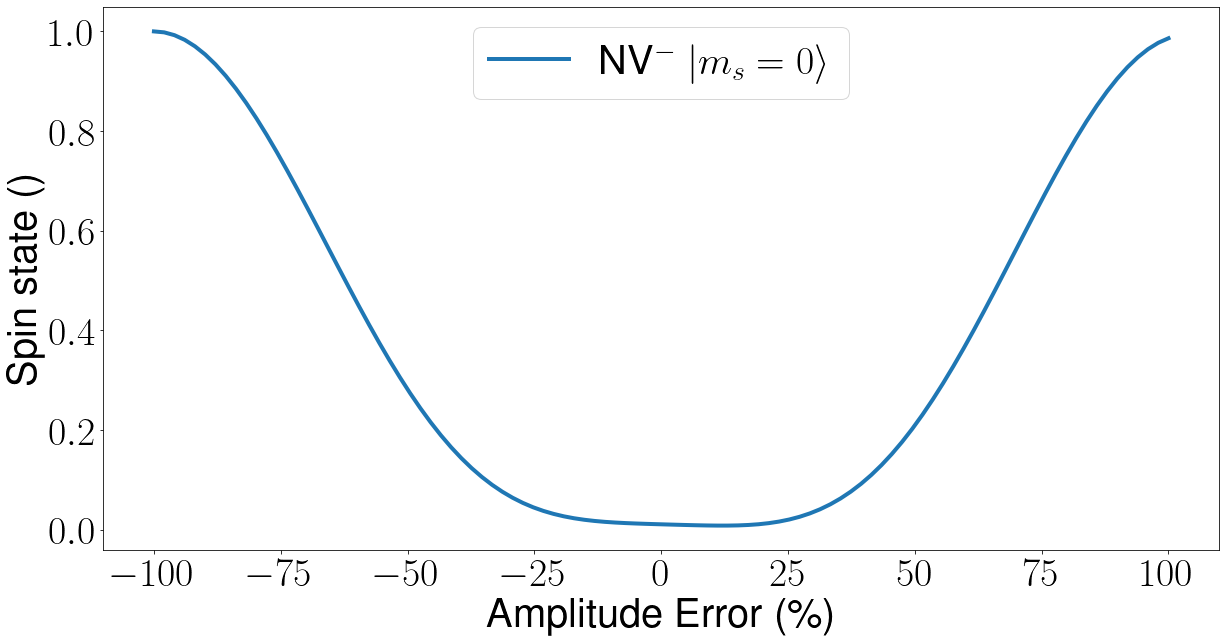

In [10]:
B= 90 #gauss

sim = TimeDependentSimulation()

# scanned amplitude steps
amp_array = np.linspace(-1, 1, 100)
data_amp_detuning = sim.run_sim_ampsweep(amp_array, pulse, B, simp)

# visualize the results
fig2, ax = plt.subplots(figsize=(20,10))
ax.plot(amp_array*100, data_amp_detuning, lw=4, label=r'NV${}^{-}~|m_s=0\rangle$')
ax.set_xlabel(r'Amplitude Error (\%)')
ax.set_ylabel(r'Spin state ()')
ax.legend(loc='best')
plt.show(fig2) 